In [27]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('/Users/ecuerbo/Desktop/data/happiness2019.csv')
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [29]:
df.columns = ['country', 'ladder', 'sd_ladder', 'positive_affect',
       'negative_affect', 'social_support', 'freedom', 'corruption',
       'generosity', 'log_gdp_per_capita', 'healthy_life_expectancy']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  156 non-null    object 
 1   ladder                   156 non-null    int64  
 2   sd_ladder                156 non-null    int64  
 3   positive_affect          155 non-null    float64
 4   negative_affect          155 non-null    float64
 5   social_support           155 non-null    float64
 6   freedom                  155 non-null    float64
 7   corruption               148 non-null    float64
 8   generosity               155 non-null    float64
 9   log_gdp_per_capita       152 non-null    float64
 10  healthy_life_expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [11]:
df.isnull().sum()

country                    0
ladder                     0
sd_ladder                  0
positive_affect            1
negative_affect            1
social_support             1
freedom                    1
corruption                 8
generosity                 1
log_gdp_per_capita         4
healthy_life_expectancy    6
dtype: int64

In [12]:
df[df.generosity.isna()]
df.drop(28,axis=0,inplace=True)

,country,ladder,sd_ladder,positive_affect,negative_affect,social_support,freedom,corruption,generosity,log_gdp_per_capita,healthy_life_expectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [17]:
df.isnull().sum()

country                    0
ladder                     0
sd_ladder                  0
positive_affect            0
negative_affect            0
social_support             0
freedom                    0
corruption                 7
generosity                 0
log_gdp_per_capita         4
healthy_life_expectancy    6
dtype: int64

In [18]:
df[df.corruption.isna()]

,country,ladder,sd_ladder,positive_affect,negative_affect,social_support,freedom,corruption,generosity,log_gdp_per_capita,healthy_life_expectancy
20,United Arab Emirates,21,65,43.0,56.0,72.0,4.0,NaN,15.0,4.0,60.0
27,Saudi Arabia,28,93,49.0,82.0,62.0,68.0,NaN,82.0,11.0,74.0
36,Bahrain,37,83,39.0,83.0,59.0,24.0,NaN,23.0,20.0,42.0
50,Kuwait,51,98,89.0,97.0,69.0,47.0,NaN,42.0,5.0,70.0
86,Turkmenistan,87,2,135.0,63.0,8.0,83.0,NaN,33.0,60.0,100.0
92,China,93,72,21.0,11.0,108.0,31.0,NaN,133.0,68.0,34.0
100,Jordan,101,127,112.0,120.0,88.0,88.0,NaN,118.0,92.0,63.0


In [19]:
df[df.log_gdp_per_capita.isna()]

,country,ladder,sd_ladder,positive_affect,negative_affect,social_support,freedom,corruption,generosity,log_gdp_per_capita,healthy_life_expectancy
24,Taiwan,25,37,17.0,1.0,48.0,102.0,56.0,56.0,NaN,NaN
63,Northern Cyprus,64,35,144.0,90.0,81.0,77.0,29.0,43.0,NaN,NaN
111,Somalia,112,74,2.0,18.0,145.0,14.0,16.0,96.0,NaN,144.0
148,Syria,149,137,155.0,155.0,154.0,153.0,38.0,69.0,NaN,128.0


In [20]:
df[df.healthy_life_expectancy.isna()]

,country,ladder,sd_ladder,positive_affect,negative_affect,social_support,freedom,corruption,generosity,log_gdp_per_capita,healthy_life_expectancy
24,Taiwan,25,37,17.0,1.0,48.0,102.0,56.0,56.0,NaN,NaN
45,Kosovo,46,107,71.0,7.0,85.0,50.0,144.0,31.0,88.0,NaN
63,Northern Cyprus,64,35,144.0,90.0,81.0,77.0,29.0,43.0,NaN,NaN
75,Hong Kong,76,33,105.0,28.0,76.0,66.0,14.0,18.0,9.0,NaN
109,Palestinian Territories,110,110,128.0,140.0,82.0,134.0,90.0,147.0,112.0,NaN
134,Swaziland,135,104,26.0,57.0,103.0,113.0,41.0,145.0,96.0,NaN


In [21]:
df.describe()

,ladder,sd_ladder,positive_affect,negative_affect,social_support,freedom,corruption,generosity,log_gdp_per_capita,healthy_life_expectancy
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,151.000000,149.000000
mean,78.819355,78.451613,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,77.000000,75.718121
std,45.146870,45.319815,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,43.734045,43.509409
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,40.500000,39.500000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,39.500000,38.000000
50%,79.000000,78.000000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,77.000000,76.000000
75%,117.500000,117.500000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.500000,113.000000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


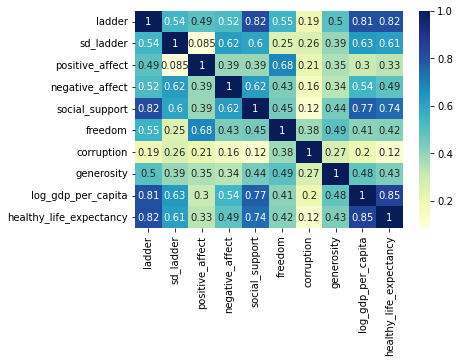

In [46]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

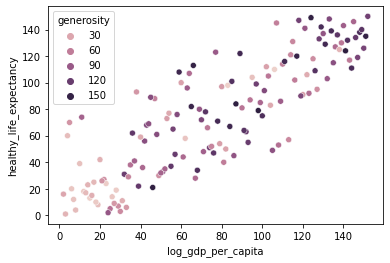

In [37]:
sns.scatterplot(y='healthy_life_expectancy',x='log_gdp_per_capita',data=df, hue='generosity');

In [42]:
ph = df[df.country=='Philippines']

In [43]:
ph

,country,ladder,sd_ladder,positive_affect,negative_affect,social_support,freedom,corruption,generosity,log_gdp_per_capita,healthy_life_expectancy
68,Philippines,69,119,42.0,116.0,75.0,15.0,49.0,115.0,97.0,99.0


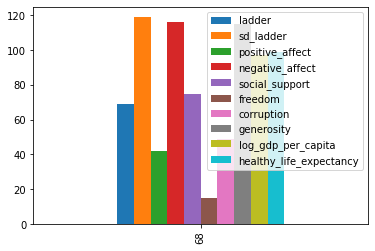

In [48]:
ph.plot(kind='bar');

In [62]:
most_generous = df[df.generosity<=10]
least_generous = df[df.generosity>145]
#print("Most generous country : {}".format(most_generous['country']))
most_generous

,country,ladder,sd_ladder,positive_affect,negative_affect,social_support,freedom,corruption,generosity,log_gdp_per_capita,healthy_life_expectancy
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
10,Australia,11,26,47.0,37.0,7.0,17.0,13.0,6.0,18.0,10.0
14,United Kingdom,15,16,52.0,42.0,9.0,63.0,15.0,4.0,23.0,24.0
15,Ireland,16,34,33.0,32.0,6.0,33.0,10.0,9.0,6.0,20.0
21,Malta,22,42,83.0,103.0,16.0,12.0,32.0,5.0,28.0,19.0
51,Thailand,52,81,20.0,35.0,53.0,18.0,131.0,10.0,62.0,58.0
91,Indonesia,92,108,9.0,104.0,94.0,48.0,129.0,2.0,83.0,98.0
130,Myanmar,131,70,45.0,86.0,96.0,29.0,24.0,1.0,106.0,110.0


In [63]:
least_generous

,country,ladder,sd_ladder,positive_affect,negative_affect,social_support,freedom,corruption,generosity,log_gdp_per_capita,healthy_life_expectancy
81,Greece,82,87,102.0,94.0,102.0,150.0,123.0,152.0,46.0,21.0
88,Morocco,89,101,110.0,91.0,139.0,76.0,84.0,154.0,98.0,79.0
89,Azerbaijan,90,24,134.0,20.0,104.0,101.0,22.0,146.0,65.0,82.0
109,Palestinian Territories,110,110,128.0,140.0,82.0,134.0,90.0,147.0,112.0,NaN
118,Georgia,119,51,141.0,43.0,147.0,104.0,28.0,153.0,87.0,84.0
121,Mauritania,122,68,94.0,58.0,99.0,151.0,67.0,148.0,117.0,120.0
143,Lesotho,144,150,72.0,64.0,98.0,97.0,59.0,151.0,124.0,149.0
144,Burundi,145,138,98.0,126.0,152.0,135.0,23.0,149.0,151.0,135.0
147,Botswana,148,125,87.0,65.0,105.0,60.0,54.0,150.0,66.0,113.0
150,Yemen,151,85,153.0,75.0,100.0,147.0,83.0,155.0,141.0,124.0


In [64]:
df.head(10)

,country,ladder,sd_ladder,positive_affect,negative_affect,social_support,freedom,corruption,generosity,log_gdp_per_capita,healthy_life_expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


In [65]:
df[df.corruption<=10]

,country,ladder,sd_ladder,positive_affect,negative_affect,social_support,freedom,corruption,generosity,log_gdp_per_capita,healthy_life_expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
13,Luxembourg,14,3,62.0,19.0,27.0,28.0,9.0,30.0,2.0,16.0
15,Ireland,16,34,33.0,32.0,6.0,33.0,10.0,9.0,6.0,20.0
33,Singapore,34,5,38.0,2.0,36.0,20.0,1.0,21.0,3.0,1.0
151,Rwanda,152,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0
